<center><h2> Charge Outside Sphere</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
<p>
Potential of charge outside of sphere via images

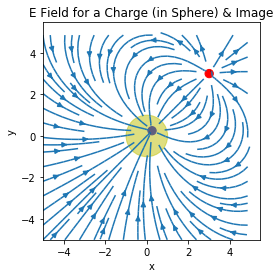

In [4]:
# ImageSphereMat.ipynb: E field lines for charge plus image 
 
import numpy as np,   matplotlib.pyplot as plt
from matplotlib.patches import Circle

Nx = 50;   Ny = 50; q = 1          # x, y grids, charge strength  
x = np.linspace(-5,5,Nx);     y = np.linspace(-5,5,Ny)
X,Y = np.meshgrid(x,y)                  # Transform coordinates
Ex = np.zeros((Nx,Ny));       Ey = np.zeros((Nx,Ny))   # Arrays
xx = 3.0;   yy = 3.0                       # Charge coordidates
dq = np.sqrt(xx*2+yy*2);      a = 1.    # Origin, sphere radius 
qp = -a*q/dq                            # Magnitude image charge
xp =  a**2*xx/dq**2;          yp =  a**2*yy/dq**2

def E(xx,yy,x,y):                         # xx,yy coord image q
    r = np.sqrt(x**2+y**2)  
    dx = (x-xx);              dy = (y-yy)       
    d1 = np.sqrt((dx**2 + dy**2))         # Distance q to (x,y) 
    dpx = x-xp;               dpy = y-yp       
    d2 = np.sqrt((dpx**2 + dpy**2))      # Distance -q to (x,y)
    Ex =  dx/d1**3-dpx/d2**3;       Ey = dy/d1**3 -dpy/d2**3      
    return Ex,Ey               
    
Ex,Ey = E(xx,yy,X,Y)
fig = plt.figure()
ax = fig.add_subplot(111)
circle1 = plt.Circle((xx, yy),0.2, color='r')
circle2 = plt.Circle((xp,yp),0.2, color='b')
sphere = plt.Circle((0,0),a, color='y',alpha=0.5)
ax.add_artist(circle1);       ax.add_artist(circle2)
ax.add_artist(sphere);        ax.streamplot(x,y,Ex,Ey)
ax.set_aspect('equal')
ax.set_title('E Field for a Charge (in Sphere) & Image')
ax.set_xlabel('x');           ax.set_ylabel('y')
plt.show()